In [1]:
# Maths and data management
import numpy as np
from tqdm.auto import tqdm
from numba import jit

# PGMC
from pgmc import KPGMC, PGMC

# Plotting packages
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting configuration
%matplotlib inline
sns.set()
sns.set_context("poster")
sns.set_style("ticks")

# ML toolkit
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.multiclass import OneVsOneClassifier,OneVsRestClassifier

# Creating the dataset

In [2]:
def get_iris():
    """
    Load Iris with some restrictions.
    """
    iris = datasets.load_iris()
    X_ = iris.data[:,:2]
    Y_ = iris.target
    X = np.array([X_[i]+np.array([0,3.3]) for i in range(len(X_)) if Y_[i] != 2])
    y = np.array([1 if i==0 else 0 for i in Y_ if i != 2])
    size_max = max([np.sqrt(sum(x**2)) for x in X])
    X = np.array([[i/size_max for i in x] for x in X],dtype=float)
    
    u = sum(X)/len(X)
    X = X-u + np.array([0.013,0.])
    return X,y

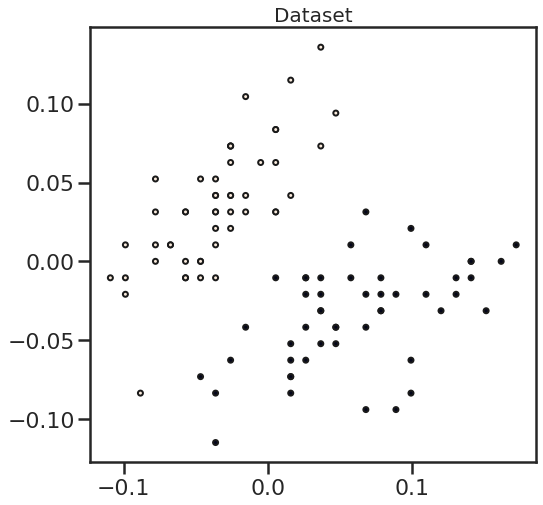

In [3]:
X,y = get_iris()

plt.figure(figsize=(8,8))
plt.title("Dataset", fontsize='small')
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

# Classification

## PGMC
- Fit complexity: $O\left(d^c\left[N + Kd^{2c}\right]\right)$
- Predict complexity: $O\left(KN_{\text{train}}d^{2c}\right)$

In [9]:
# Creation of the classifier
clf1 = PGMC(embedding="orthogonal", class_weight_method="auto")

# Fit
clf1.fit(X,y)

# Predict
y_pred = clf1.predict(X)

# Accuracy
acc = sk.metrics.accuracy_score(y,y_pred)
print(f"PGMC accuracy: {acc}")

PGMC accuracy: 1.0


## KPGMC
- Fit complexity: $O\left(KN_{\text{fit}}^3\right)$
- Predict complexity: $O\left(KN_{\text{fit}}^2N_{\text{predict}}\right)$

In [5]:
"""
Creation of a personalized kernel. 
The kernel must have two arguments.
The kernel must be numba jit compiled.
"""
@jit
def rbf_kernel(x,y):
    return np.exp(-np.linalg.norm(x-y)**2)

# Creation of the classifier
clf2 = KPGMC(embedding="orthogonal", class_weight_method=None, device="cpu")

# Fit
clf2.fit(X,y)

# Predict
y_pred = clf2.predict(X)

# Accuracy
acc = sk.metrics.accuracy_score(y,y_pred)
print(f"KPGMC accuracy: {acc}")

KPGMC accuracy: 1.0


## Help

In [6]:
help(PGMC)

Help on class PGMC in module pgmc.pgmc:

class PGMC(sklearn.base.BaseEstimator, sklearn.base.ClassifierMixin)
 |  PGMC(embedding=None, class_weight_method=None, copies=1, device='cpu')
 |  
 |  Class For the k-PGMC algorithm
 |  This class implement the k-PGMC algorithm including classe's weights optimization and kernel/embedding specification.
 |  The pseudo inverse (necessary for the K-PGMC) use pytorch subroutine. If you wish to run it on cuda it is possible by specifying the device.
 |  This class is sklearn compliant and can be used with sklearn functions like k-fold crossvalidation or pipeline.
 |  
 |  Method resolution order:
 |      PGMC
 |      sklearn.base.BaseEstimator
 |      sklearn.base.ClassifierMixin
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, embedding=None, class_weight_method=None, copies=1, device='cpu')
 |      Initialisation of a new KPGMC
 |      Parameters:
 |          - embedding (str or function, default=None) : The embeddin